# Homework TensorFlow: Fashion MNIST

https://www.kaggle.com/zalando-research/fashionmnist


Homework instruction: fashion mnist classification.

Here is the homework regarding the TensorFlow library!

The goal is to build a neural network in TensorFlow to classify types of clothes! You can use the dataset fashion_mnist in order to do this homework. 

You can check here and here more information. No hints are necessary because it's very similar to the MNIST example :)

https://www.tensorflow.org/datasets/catalog/fashion_mnist

## Loading the dataset

In [1]:
import tensorflow
tensorflow.__version__

'2.8.2'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Class 6')

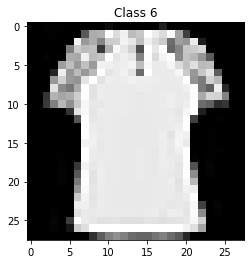

In [4]:
i = np.random.randint(0, len(X_train))
plt.imshow(X_train[i], cmap = 'gray')
plt.title('Class ' + str(y_train[i]))

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

In [7]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_test = X_test.reshape(10000, 28 * 28)
X_test.shape

(10000, 784)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
X_train /= 255
X_test /= 255

In [12]:
X_train.max()

1.0

In [13]:
X_train.min()

0.0

In [14]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Neural network (training)

In [15]:
(784 + 10) / 2

397.0

In [16]:
network = Sequential()
network.add(Dense(input_shape = (784,), units = 397, activation = 'relu'))
network.add(Dense(units = 397, activation = 'relu'))
network.add(Dense(units = 10, activation = 'softmax'))

In [17]:
network.compile(loss = 'sparse_categorical_crossentropy', 
                      optimizer = 'adam', 
                      metrics = ['accuracy'])

In [18]:
history = network.fit(X_train, y_train, batch_size = 128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.4838 - accuracy: 0.8290
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3536 - accuracy: 0.8702
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3149 - accuracy: 0.8841
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2938 - accuracy: 0.8913
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2744 - accuracy: 0.8967
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2581 - accuracy: 0.9036
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2496 - accuracy: 0.9064
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2331 - accuracy: 0.9117
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2274 - accuracy: 0.9136
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2172 - accuracy: 0.9174

## Neural network (evaluation)

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

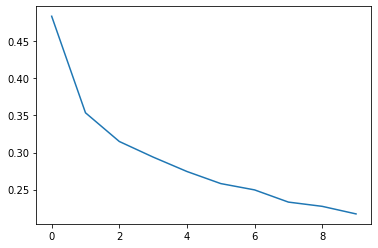

In [20]:
plt.plot(history.history['loss'])

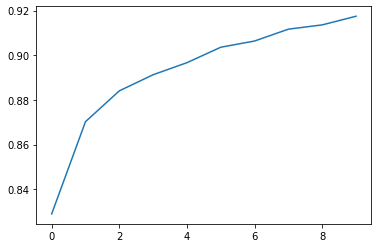

In [21]:
plt.plot(history.history['accuracy'])

In [22]:
accuracy_test = network.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.8884


In [23]:
predictions = network.predict(X_test)

In [24]:
predictions[0]

array([4.4872849e-08, 4.7310145e-06, 1.8963873e-07, 1.3032188e-07,
       1.8854081e-08, 4.0287705e-05, 6.7838940e-08, 1.2685743e-02,
       1.9419504e-08, 9.8726881e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

Text(0.5, 1.0, 'Class 9')

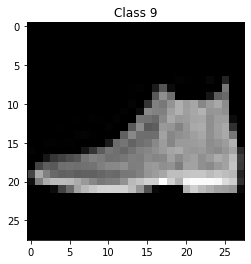

In [26]:
plt.imshow(X_test[0].reshape(28, 28), cmap = 'gray')
plt.title('Class ' + str(y_test[0]))

**Conclusion: our Neural Network model has correctly predicted class 9 as Ankle boot and we have model accuracy 88%. **